<a href="https://colab.research.google.com/github/sushantkumar402/Diabetes-classification-using-ANN/blob/master/Diabetes_Classification_with_Artificial_Neural_Network_(Classification_Model).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## STEP 0#: Importing the Libraries

In [1]:
#!pip install tensorflow-gpu==2.0.0.alpha0

In [2]:
!pip install tensorflow
try:
  %tensorflow_version 1.x
except Exception:
  pass

TensorFlow 1.x selected.


In [3]:
import tensorflow as tf
import pandas as pd
import seaborn as sns  # to plot images and statical version of data
import numpy as np
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## STEP #1: Importing the Dataset

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [7]:
diabetes = pd.read_csv('/content/drive/My Drive/ML_Dataset/Diabetes classification/diabetes.csv')

In [8]:
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [9]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
diabetes.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [11]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [12]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## STEP #2: Cleanup and Visualize the Dataset

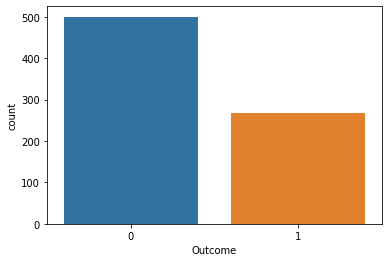

In [13]:
sns.countplot(diabetes['Outcome'], label='count')
plt.show()

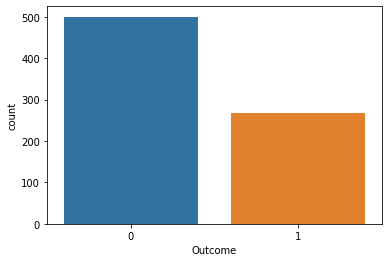

In [14]:
sns.countplot(x = 'Outcome', data=diabetes)

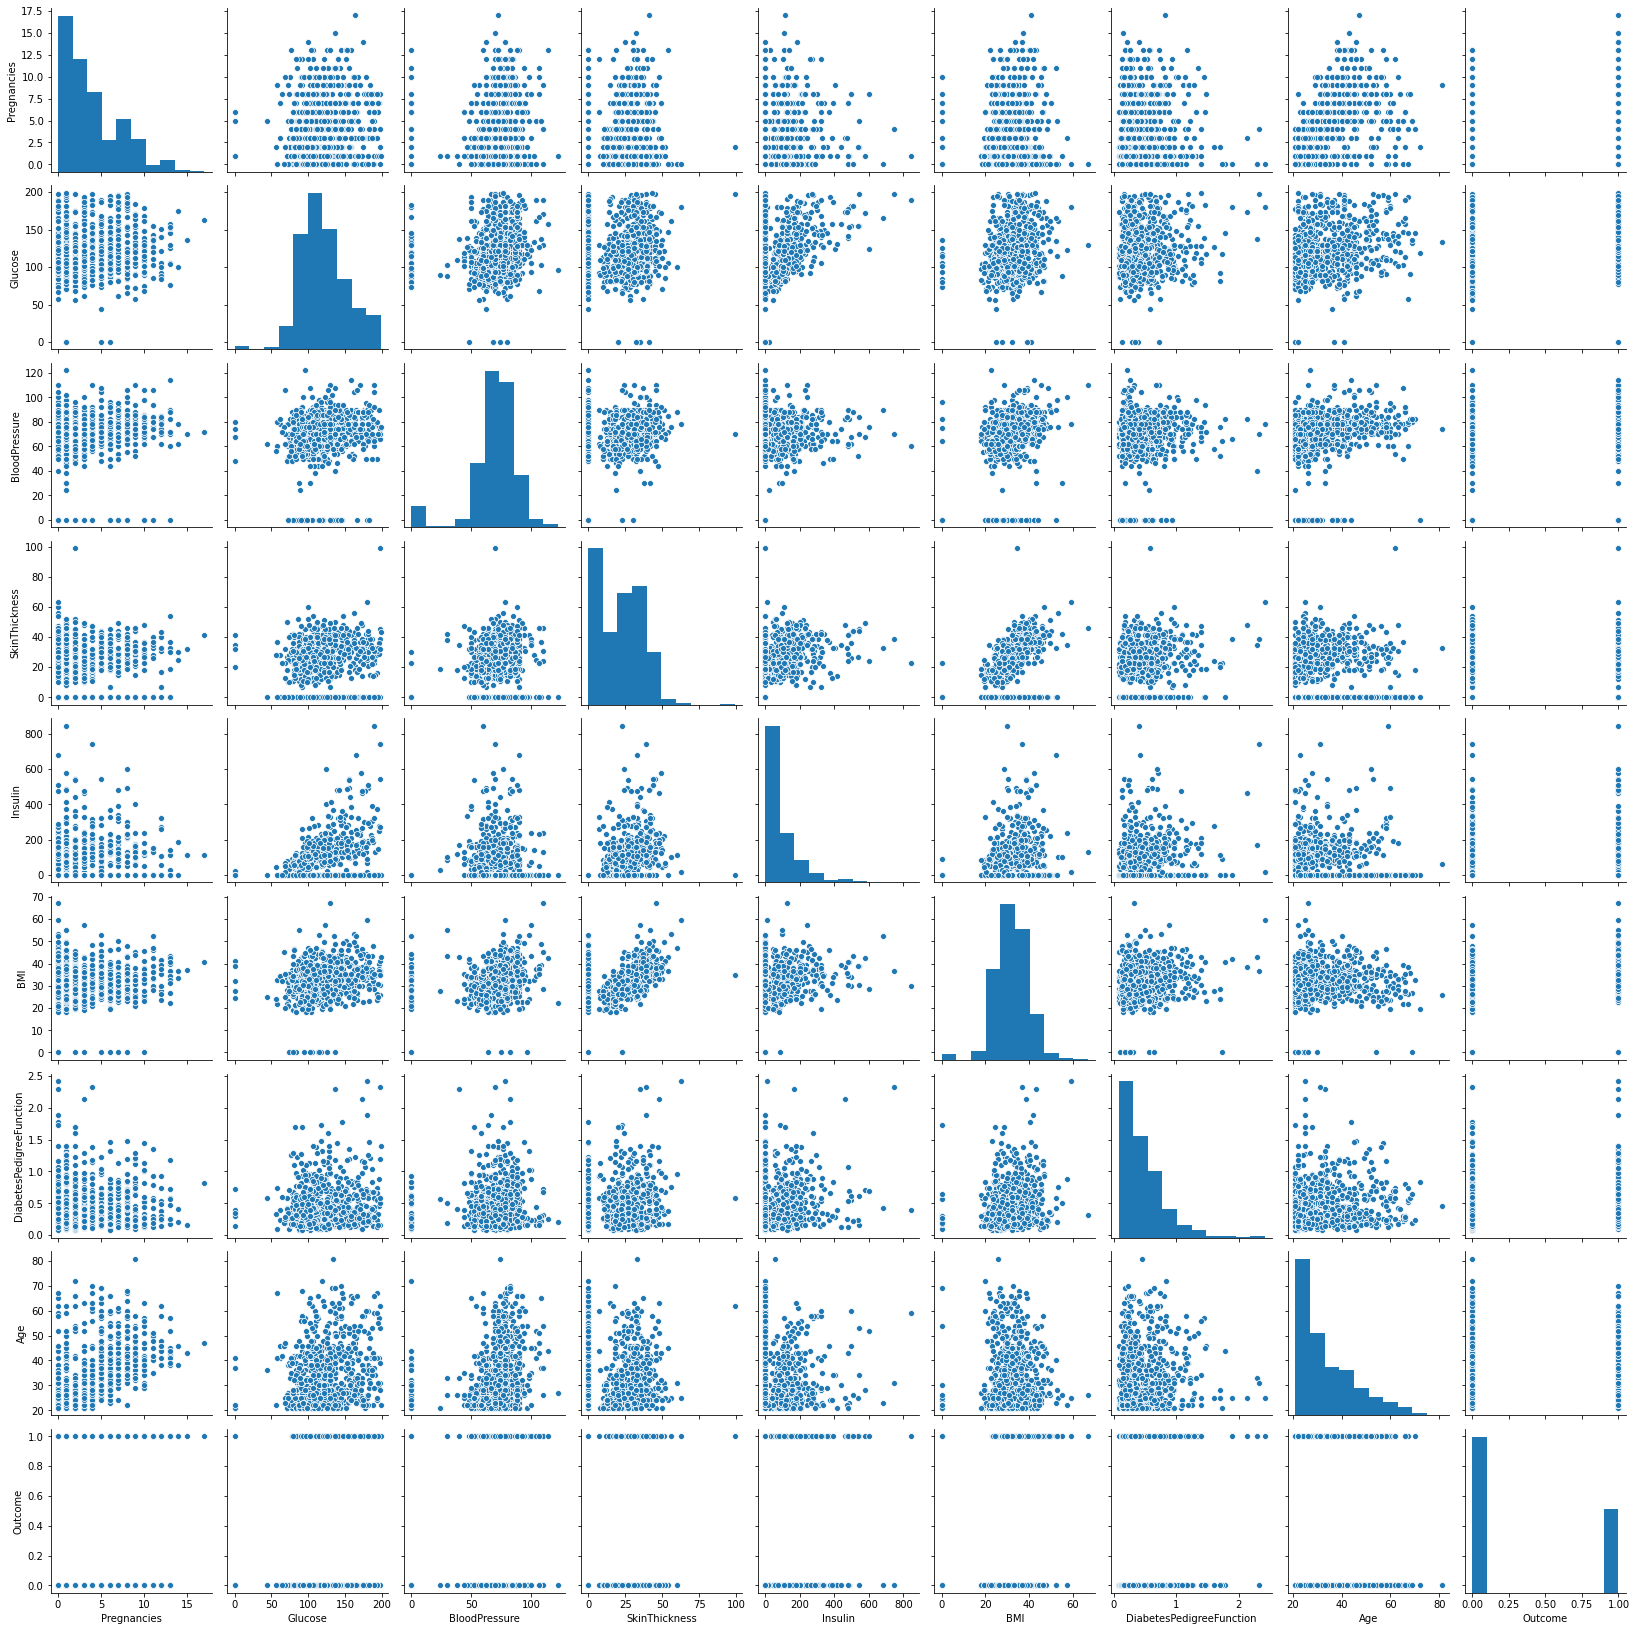

In [15]:
sns.pairplot(diabetes, palette=True)

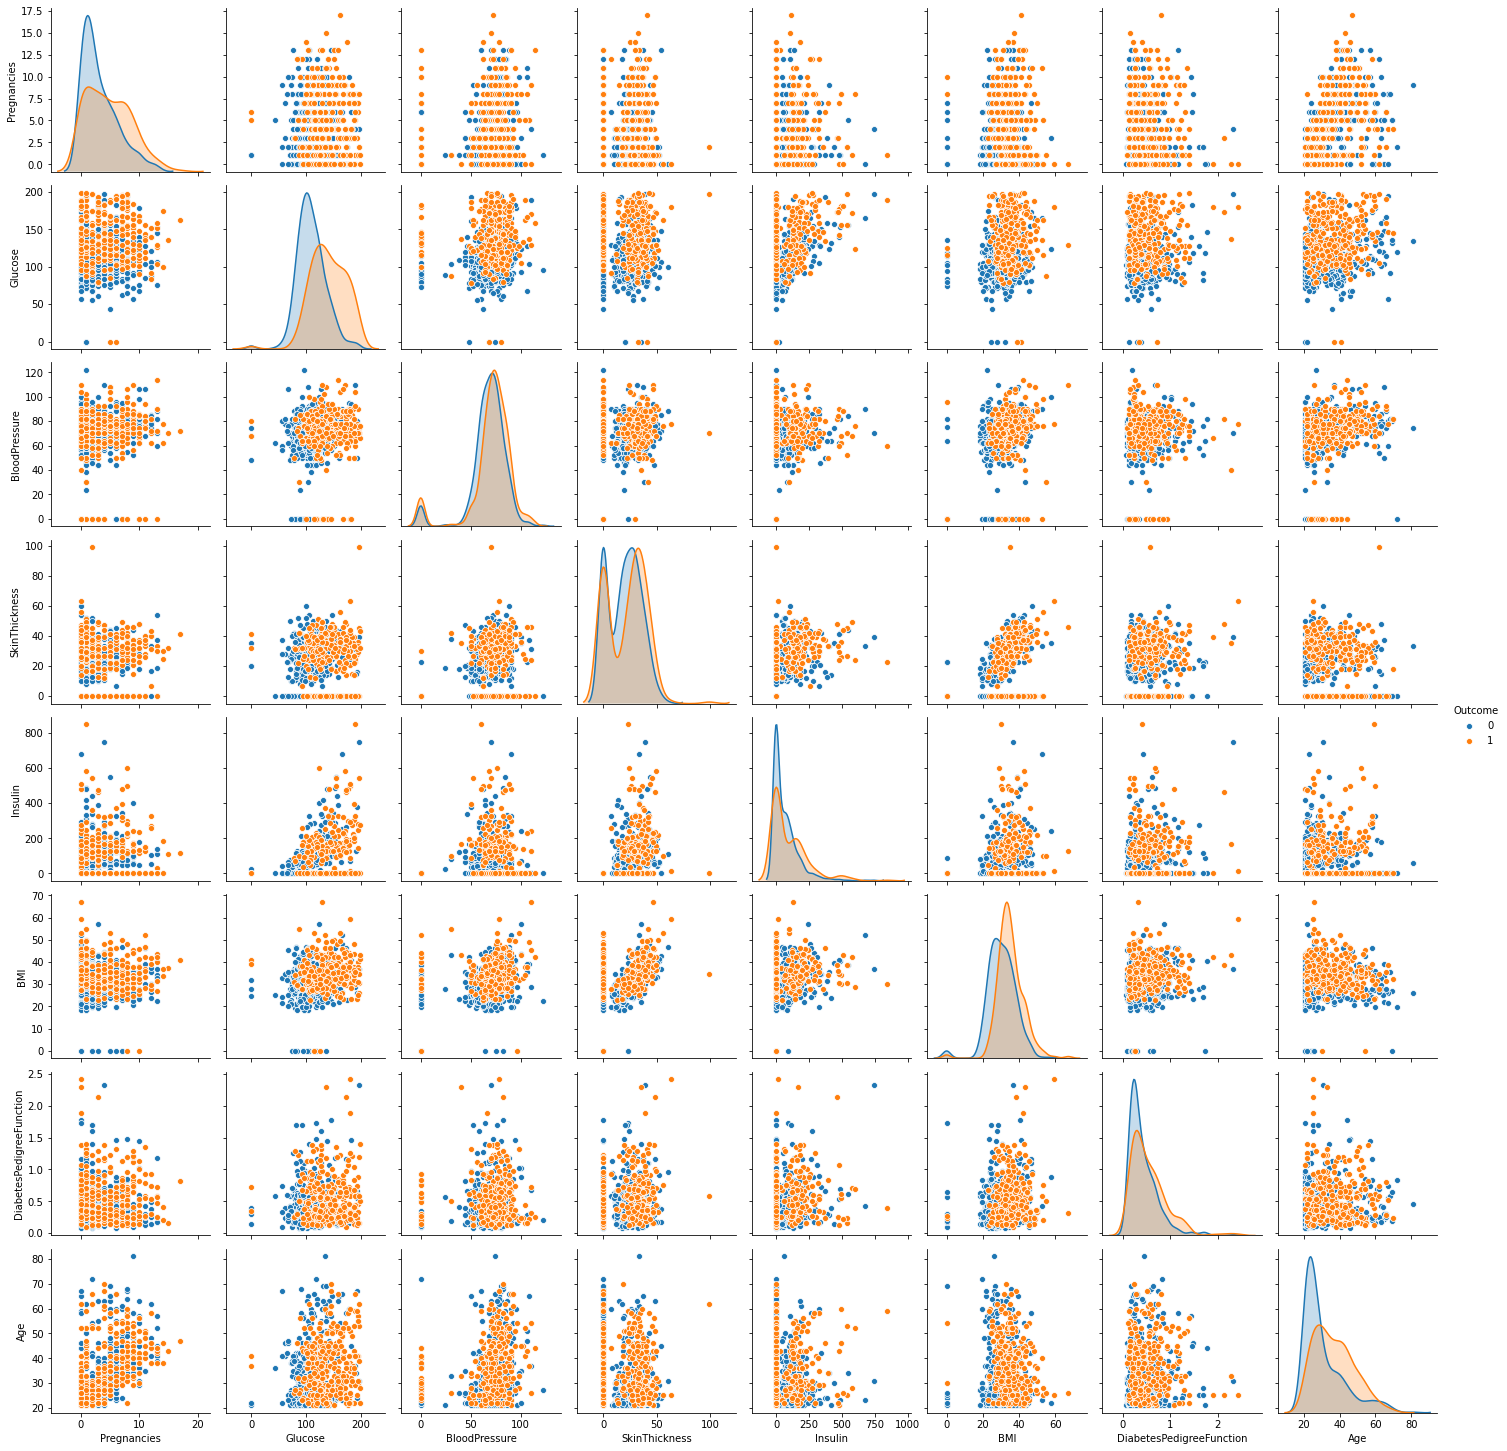

In [16]:
sns.pairplot(diabetes, hue='Outcome', vars= ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age' ])

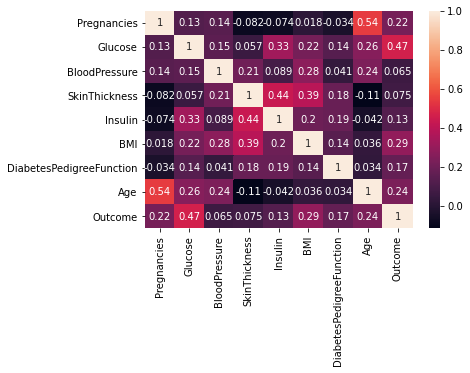

In [17]:
sns.heatmap(diabetes.corr(), annot=True)

In [18]:
X = diabetes.drop('Outcome', axis=1)

In [19]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [20]:
y =diabetes['Outcome']

In [21]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, train_size = 0.8)

In [25]:
X_train.shape

(614, 8)

In [26]:
X_test.shape

(154, 8)

In [27]:
y_train.shape

(614,)

In [28]:
y_test.shape

(154,)

## STEP #3: Training the Model

In [29]:
ANN_classifier = tf.keras.Sequential()
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu', input_shape = (8,)))
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units=400, activation='relu'))
ANN_classifier.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [30]:
ANN_classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 400)               3600      
_________________________________________________________________
dense_1 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_2 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_3 (Dense)              (None, 400)               160400    
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 401       
Total params: 485,201
Trainable params: 485,201
Non-trainable params: 0
_________________________________________________________________


In [31]:
ANN_classifier.compile(optimizer = 'Adam', loss= 'binary_crossentropy', metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [32]:
epochs_hist = ANN_classifier.fit(X_train, y_train, epochs=200)

Train on 614 samples
Epoch 1/200
614/614 [==============================] - 2s 3ms/sample - loss: 0.6483 - acc: 0.6482
Epoch 2/200
614/614 [==============================] - 0s 88us/sample - loss: 0.5683 - acc: 0.7020
Epoch 3/200
614/614 [==============================] - 0s 86us/sample - loss: 0.5767 - acc: 0.7199
Epoch 4/200
614/614 [==============================] - 0s 113us/sample - loss: 0.5674 - acc: 0.7134
Epoch 5/200
614/614 [==============================] - 0s 94us/sample - loss: 0.5164 - acc: 0.7410
Epoch 6/200
614/614 [==============================] - 0s 90us/sample - loss: 0.5030 - acc: 0.7394
Epoch 7/200
614/614 [==============================] - 0s 97us/sample - loss: 0.4611 - acc: 0.7866
Epoch 8/200
614/614 [==============================] - 0s 114us/sample - loss: 0.4551 - acc: 0.7980
Epoch 9/200
614/614 [==============================] - 0s 87us/sample - loss: 0.4767 - acc: 0.7704
Epoch 10/200
614/614 [==============================] - 0s 105us/sample - loss: 0.4521 

In [33]:
# preparing for the confusion matrix for trainig data
y_pred_train = ANN_classifier.predict(X_train)
y_pred_train

array([[1.17033720e-04],
       [9.99898136e-01],
       [9.99999881e-01],
       [0.00000000e+00],
       [9.99904275e-01],
       [1.78813934e-07],
       [9.99998450e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.20537186e-06],
       [0.00000000e+00],
       [1.50501728e-05],
       [1.00000000e+00],
       [9.99999166e-01],
       [5.96046448e-08],
       [1.00000000e+00],
       [2.98023224e-07],
       [1.94311142e-05],
       [1.00000000e+00],
       [0.00000000e+00],
       [9.99992609e-01],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.60858035e-03],
       [0.00000000e+00],
       [0.00000000e+00],
       [2.83122063e-06],
       [0.00000000e+00],
       [0.00000000e+00],
       [1.00000000e+00],
       [9.99999702e-01],
       [4.17232513e-07],
       [9.99999881e-01],
       [0.00000000e+00],
